<b> Modelling census income data 

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import altair.vegalite.v2 as vl
##from altair.vegalite.v2 import api as alt
import matplotlib.pyplot as plt

cen_dem = pd.read_csv('C:/Users/abhis/git/sb_capstone/income/census/census-income.data',header=None)
cen_dem.columns = ['age',	'_class_of_worker',	'_industry_code',	'_occupation_code',	'_education',	'_wage_per_hour',
                   '_enrolled_in_edu_inst_last_wk',	'_marital_status',	'_major_industry_code',	'_major_occupation_code',
                   '_mace',	'_hispanic_Origin',	'_sex',	'_member_of_a_labor_union',	'_reason_for_unemployment',
                   '_full_or_part_time_employment_stat',	'_capital_gains',	'_capital_losses',	'_divdends_from_stocks',
                   '_tax_filer_status',	'_region_of_previous_residence',	'_state_of_previous_residence',
                   '_detailed_household_and_family_stat',	'_detailed_household_summary_in_household',	'_instance_weight',
                   '_migration_code-change_in_msa',	'_migration_code-change_in_reg',	'_migration_code-move_within_reg',
                   '_live_in_this_house_1_year_ago',	'_migration_prev_res_in_sunbelt',	'_num_persons_worked_for_employer',
                   '_family_members_under_18',	'_country_of_birth_father',	'_country_of_birth_mother',	'_country_of_birth_self',
                   '_citizenship',	'_own_business_or_self_employed',
                   'fill_inc_questionnaire',	'_veterans_benefits',	'_weeks_worked_in_year','year',	'Income_category'
]

cen_dem_test = pd.read_csv('C:/Users/abhis/git/sb_capstone/income/census/census-income.test',header=None)
cen_dem_test.columns = ['age',	'_class_of_worker',	'_industry_code',	'_occupation_code',	'_education',	'_wage_per_hour',
                   '_enrolled_in_edu_inst_last_wk',	'_marital_status',	'_major_industry_code',	'_major_occupation_code',
                   '_mace',	'_hispanic_Origin',	'_sex',	'_member_of_a_labor_union',	'_reason_for_unemployment',
                   '_full_or_part_time_employment_stat',	'_capital_gains',	'_capital_losses',	'_divdends_from_stocks',
                   '_tax_filer_status',	'_region_of_previous_residence',	'_state_of_previous_residence',
                   '_detailed_household_and_family_stat',	'_detailed_household_summary_in_household',	'_instance_weight',
                   '_migration_code-change_in_msa',	'_migration_code-change_in_reg',	'_migration_code-move_within_reg',
                   '_live_in_this_house_1_year_ago',	'_migration_prev_res_in_sunbelt',	'_num_persons_worked_for_employer',
                   '_family_members_under_18',	'_country_of_birth_father',	'_country_of_birth_mother',	'_country_of_birth_self',
                   '_citizenship',	'_own_business_or_self_employed',
                   'fill_inc_questionnaire',	'_veterans_benefits',	'_weeks_worked_in_year','year',	'Income_category'
]

cen_dem_test.info()

miss_col = ['_region_of_previous_residence',	'_migration_code-change_in_msa',	'_migration_code-change_in_reg',	
           '_migration_code-move_within_reg',	'_migration_prev_res_in_sunbelt',	'_country_of_birth_father',	
           '_country_of_birth_mother',	'_country_of_birth_self']
cont_col = ['age','_wage_per_hour','_capital_losses','_capital_gains',
             '_divdends_from_stocks','_weeks_worked_in_year']
special_col = ['Income_category','_instance_weight','year']

cat_col = [el for el in cen_dem.columns if el not in cont_col ]
cat_col = [el for el in cat_col if el not in special_col ]

print(cat_col)
print(cont_col)
print(special_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
age                                         99762 non-null int64
_class_of_worker                            99762 non-null object
_industry_code                              99762 non-null int64
_occupation_code                            99762 non-null int64
_education                                  99762 non-null object
_wage_per_hour                              99762 non-null int64
_enrolled_in_edu_inst_last_wk               99762 non-null object
_marital_status                             99762 non-null object
_major_industry_code                        99762 non-null object
_major_occupation_code                      99762 non-null object
_mace                                       99762 non-null object
_hispanic_Origin                            99762 non-null object
_sex                                        99762 non-null object
_member_of_a_labor_union             

In [2]:
# Getting dummy variables for all categorical columns

cen_dem_cp = cen_dem.copy()
cen_dem_test_cp = cen_dem_test.copy()

for col in cat_col:
    cen_dem_cp[col] =  cen_dem_cp[col].astype('str')
    cen_dem_cp[col] = cen_dem_cp[col].str.strip()
    cen_dem_test_cp[col] =  cen_dem_test_cp[col].astype('str')
    cen_dem_test_cp[col] = cen_dem_test_cp[col].str.strip()
    
cen_dem_test_cp.info()   
dumm = pd.get_dummies(cen_dem_cp[cat_col])
dumm_test = pd.get_dummies(cen_dem_test_cp[cat_col])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
age                                         99762 non-null int64
_class_of_worker                            99762 non-null object
_industry_code                              99762 non-null object
_occupation_code                            99762 non-null object
_education                                  99762 non-null object
_wage_per_hour                              99762 non-null int64
_enrolled_in_edu_inst_last_wk               99762 non-null object
_marital_status                             99762 non-null object
_major_industry_code                        99762 non-null object
_major_occupation_code                      99762 non-null object
_mace                                       99762 non-null object
_hispanic_Origin                            99762 non-null object
_sex                                        99762 non-null object
_member_of_a_labor_union           

In [3]:

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_seq_items', 2000)

dumm.columns = dumm.columns.str.replace(' ','-')
dumm_test.columns = dumm_test.columns.str.replace(' ','-')
dumm.info()

dumm_test['_detailed_household_and_family_stat_Grandchild-<18-ever-marr-not-in-subfamily'] = np.repeat(0,dumm_test.shape[0])
#dumm.drop(['_detailed_household_and_family_stat_Grandchild-<18-ever-marr-not-in-subfamily'],axis=1)

dumm.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Columns: 508 entries, _class_of_worker_Federal-government to _veterans_benefits_2
dtypes: uint8(508)
memory usage: 96.7 MB


,_class_of_worker_Federal-government,_class_of_worker_Local-government,_class_of_worker_Never-worked,_class_of_worker_Not-in-universe,_class_of_worker_Private,_class_of_worker_Self-employed-incorporated,_class_of_worker_Self-employed-not-incorporated,_class_of_worker_State-government,_class_of_worker_Without-pay,_industry_code_0,_industry_code_1,_industry_code_10,_industry_code_11,_industry_code_12,_industry_code_13,_industry_code_14,_industry_code_15,_industry_code_16,_industry_code_17,_industry_code_18,_industry_code_19,_industry_code_2,_industry_code_20,_industry_code_21,_industry_code_22,_industry_code_23,_industry_code_24,_industry_code_25,_industry_code_26,_industry_code_27,_industry_code_28,_industry_code_29,_industry_code_3,_industry_code_30,_industry_code_31,_industry_code_32,_industry_code_33,_industry_code_34,_industry_code_35,_industry_code_36,_industry_code_37,_industry_code_38,_industry_code_39,_industry_code_4,_industry_code_40,_industry_code_41,_industry_code_42,_industry_code_43,_industry_code_44,_industry_code_45,_industry_code_46,_industry_code_47,_industry_code_48,_industry_code_49,_industry_code_5,_industry_code_50,_industry_code_51,_industry_code_6,_industry_code_7,_industry_code_8,_industry_code_9,_occupation_code_0,_occupation_code_1,_occupation_code_10,_occupation_code_11,_occupation_code_12,_occupation_code_13,_occupation_code_14,_occupation_code_15,_occupation_code_16,_occupation_code_17,_occupation_code_18,_occupation_code_19,_occupation_code_2,_occupation_code_20,_occupation_code_21,_occupation_code_22,_occupation_code_23,_occupation_code_24,_occupation_code_25,_occupation_code_26,_occupation_code_27,_occupation_code_28,_occupation_code_29,_occupation_code_3,_occupation_code_30,_occupation_code_31,_occupation_code_32,_occupation_code_33,_occupation_code_34,_occupation_code_35,_occupation_code_36,_occupation_code_37,_occupation_code_38,_occupation_code_39,_occupation_code_4,_occupation_code_40,_occupation_code_41,_occupation_code_42,_occupation_code_43,_occupation_code_44,_occupation_code_45,_occupation_code_46,_occupation_code_5,_occupation_code_6,_occupation_code_7,_occupation_code_8,_occupation_code_9,_education_10th-grade,_education_11th-grade,_education_12th-grade-no-diploma,_education_1st-2nd-3rd-or-4th-grade,_education_5th-or-6th-grade,_education_7th-and-8th-grade,_education_9th-grade,_education_Associates-degree-academic-program,_education_Associates-degree-occup-/vocational,_education_Bachelors-degree(BA-AB-BS),_education_Children,_education_Doctorate-degree(PhD-EdD),_education_High-school-graduate,_education_Less-than-1st-grade,_education_Masters-degree(MA-MS-MEng-MEd-MSW-MBA),_education_Prof-school-degree-(MD-DDS-DVM-LLB-JD),_education_Some-college-but-no-degree,_enrolled_in_edu_inst_last_wk_College-or-university,_enrolled_in_edu_inst_last_wk_High-school,_enrolled_in_edu_inst_last_wk_Not-in-universe,_marital_status_Divorced,_marital_status_Married-A-F-spouse-present,_marital_status_Married-civilian-spouse-present,_marital_status_Married-spouse-absent,_marital_status_Never-married,_marital_status_Separated,_marital_status_Widowed,_major_industry_code_Agriculture,_major_industry_code_Armed-Forces,_major_industry_code_Business-and-repair-services,_major_industry_code_Communications,_major_industry_code_Construction,_major_industry_code_Education,_major_industry_code_Entertainment,_major_industry_code_Finance-insurance-and-real-estate,_major_industry_code_Forestry-and-fisheries,_major_industry_code_Hospital-services,_major_industry_code_Manufacturing-durable-goods,_major_industry_code_Manufacturing-nondurable-goods,_major_industry_code_Medical-except-hospital,_major_industry_code_Mining,_major_industry_code_Not-in-universe-or-children,_major_industry_code_Other-professional-services,_major_industry_code_Personal-services-except-private-HH,_major_industry_code_Private-household-services,_major_industry_code_Public-administration,_major_industry_code_Retail-trade,_major_industry_code_Social-ser

In [55]:
dfile = open("dumm.columns","w")
dfile.write(str(dumm.columns))
dfile.close()

In [56]:
dtfile = open("dumm_test.columns","w")
dtfile.write(str(dumm_test.columns))
dtfile.close()

In [5]:

from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

d= {' 50000+.':1, ' - 50000.':0}


# Setting up the model X,Y
X = pd.concat((dumm,cen_dem[cont_col]),axis=1)
y = cen_dem['Income_category'].map(d)

print('X columns type :',type(pd.Series(X.columns)))
print("X", X.index,"columns:",pd.Series(X.columns))
print("y", y.index)

rr1 = range(y.size)
print(y.size,"Overall size: %s " %pd.Series(y,index=rr1,copy=True).value_counts(dropna=False))

data_dict_X = {}
data_dict_y = {}
data_dict_X_sm = {}
data_dict_y_sm = {}

X_train = X
y_train = y
        
print("y_train size: %d" % X.size)

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
df_X_sm = pd.DataFrame(X_sm, columns= X.columns)
        
print(type(X_sm),"---",type(y_sm))

X_test = pd.concat((dumm_test,cen_dem_test[cont_col]),axis=1)
y_test = cen_dem_test['Income_category'].map(d)

X columns type : <class 'pandas.core.series.Series'>
X RangeIndex(start=0, stop=199523, step=1) columns: 0                    _class_of_worker_Federal-government
1                      _class_of_worker_Local-government
2                          _class_of_worker_Never-worked
3                       _class_of_worker_Not-in-universe
4                               _class_of_worker_Private
5            _class_of_worker_Self-employed-incorporated
6        _class_of_worker_Self-employed-not-incorporated
7                      _class_of_worker_State-government
8                           _class_of_worker_Without-pay
9                                       _industry_code_0
10                                      _industry_code_1
11                                     _industry_code_10
12                                     _industry_code_11
13                                     _industry_code_12
14                                     _industry_code_13
15                                     _

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:732: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


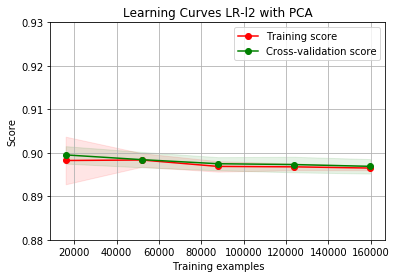

In [12]:


#from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression

from sklearn import svm
import sys
old_stdout = sys.stdout

log_file = open("C:/Users/abhis/git/sb_capstone/income/census/message_learn.log","w")

sys.stdout = log_file

print("this will be written to message_learn.log")


# Creating a scaling transformer for Continuous variables only - NO transformation needed for dummy variables
preprocess = make_column_transformer((cont_col,StandardScaler()),remainder='passthrough')

# Creating various Model Algo. pipelines
pipe_lr_pca = Pipeline([('scl', preprocess),
            ('pca', PCA(n_components=5)),
            ('clf', LogisticRegression(penalty='l2',C=0.1, solver='liblinear',random_state=42))])

jobs = -1

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5),scr='roc_auc'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scr,verbose=100)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves LR-l2 with PCA"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = pipe_lr_pca
plot_learning_curve(estimator, title, X, y, ylim=(0.88, 0.93), cv=cv, n_jobs=4, scr='roc_auc')

plt.show()


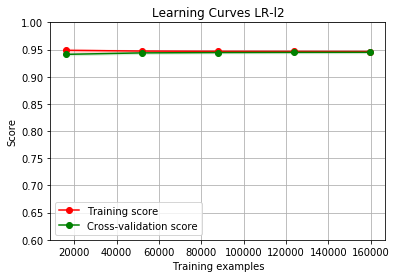

In [16]:
pipe_lr = Pipeline([('scl', preprocess),
            ('clf', LogisticRegression(penalty='l2',C=0.1, solver='liblinear',random_state=42))])

title1 = "Learning Curves LR-l2"
estimator = pipe_lr
plot_learning_curve(estimator, title1, X, y, ylim=(0.6, 1.0), cv=cv, n_jobs=4, scr='roc_auc')

plt.show()

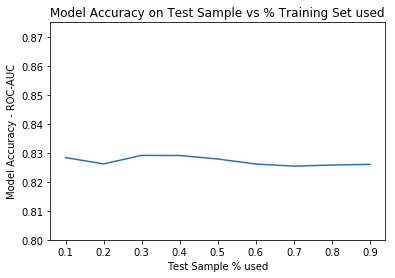

In [27]:

sys.stdout = old_stdout

log_file.close()

plt.title('Model Accuracy on Test Sample vs % Training Set used')
plt.ylim([.8,.875])
plt.xlabel('Test Sample % used')
plt.ylabel('Model Accuracy - ROC-AUC')
plt.plot(learning_curve.keys(),learning_curve.values())
plt.show()
